In [14]:
import matplotlib.pyplot as plt

import h5py
import numpy as np

In [2]:
from IPython.display import clear_output
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")

In [3]:
os.chdir("..")
print("Current working directory:", os.getcwd())

Current working directory: /g/g92/noh1/fast2


In [4]:
from datasets.pdbbind import PDBBind2016, PDBBind2020

/g/g92/noh1/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
subsets_2020 = ["train", "val", "test"]
input_type = "graph"

configs_2020 = {
    "input_type": input_type,
    "max_atoms": 2000,
}

In [8]:
pdbbind_2020 = {subset: PDBBind2020(mode=subset, subset=subset, configs=configs_2020) for subset in subsets_2020}

In [19]:
affinity_scores = {}

for subset in subsets_2020:
    affinity_scores[subset] = [float(_affinity) for _id, _pose, _affinity in pdbbind_2020[subset].data_list]

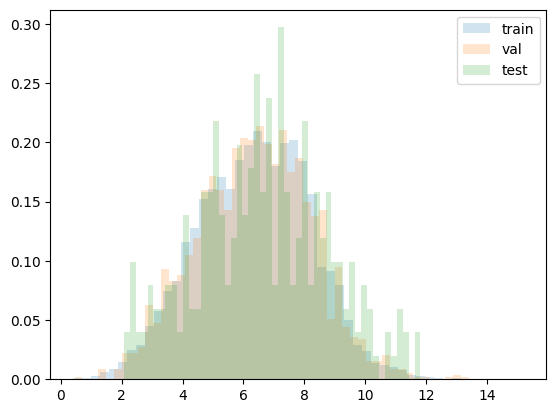

In [25]:
tag = ""
bins = 50
alpha = 0.2
density = True

for subset in subsets_2020:
    plt.hist(affinity_scores[subset], bins=bins, alpha=alpha, density=density, label=subset)
plt.legend(loc='upper right')
plt.show()

In [26]:
all_affinities = affinity_scores["train"] + affinity_scores["val"] + affinity_scores["test"]
min(all_affinities), max(all_affinities)

(0.4, 15.22)